In [1]:
import sys
sys.path.append("../../")

# DataProvider

The `DataProvider` module acts as an interface between the stochastic process and the model.

In [2]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # Suppress depreciation warnings

In [3]:
from neuralprocesses.utils.gp import GaussianProcess
from neuralprocesses.utils.gp import squared_exponential_kernel
from neuralprocesses.np.aux import DataProvider

In [4]:
tf.reset_default_graph()
tf.set_random_seed(2019)

In [5]:
plotting_mode = tf.placeholder(dtype=tf.bool, name="plotting_mode")
distribution = GaussianProcess(squared_exponential_kernel)
data_provider = DataProvider(distribution, batch_size=1, plot_settings={"num_context": 6})

In [6]:
data = data_provider(plotting_mode)

In [7]:
(x_context, y_context), x_target = data.queries
y_target = data.targets

In [8]:
plot_context = tf.squeeze(tf.stack([x_context, y_context], axis=2))
plot_target = tf.squeeze(tf.stack([x_target, y_target], axis=2))

In [9]:
with tf.Session() as session:
    ctxt, trgt = session.run([plot_context, plot_target], feed_dict={plotting_mode: True})

In [10]:
from neuralprocesses.utils.plotting import list_plot
from neuralprocesses.utils.plotting import Color

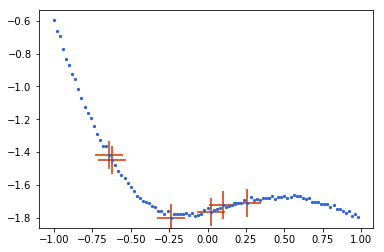

In [11]:
list_plot([ctxt, trgt], plot_style=[{"Marker": "+", "PointSize": 800}, "."])